In [1]:
from pprint import pprint
import datetime
import pickle

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD

In [2]:
def one_hot_df(df,one_hot_cols,drop_cols):
    dfret = df.copy()
    dfret = pd.get_dummies(dfret,columns=one_hot_cols).drop(columns=drop_cols)
    return dfret

In [3]:
def get_data(data_category="base", data_suffix="", one_hot_main=False, one_hot_both=False):
    train_x = pd.read_csv("data/preprocess-%s-x-train%s.csv" % (data_category, data_suffix), index_col=0)
    train_y = pd.read_csv("data/preprocess-%s-y-train%s.csv" % (data_category, data_suffix))
    valid_x = pd.read_csv("data/preprocess-%s-x-valid%s.csv" % (data_category, data_suffix), index_col=0)
    valid_y = pd.read_csv("data/preprocess-%s-y-valid%s.csv" % (data_category, data_suffix))
    
    if data_category == "basic_name" and data_suffix == "-correct":
        train_x.rename(inplace=True, columns={
            "launched_month_deadline_month_0": "launched_month",
            "launched_month_deadline_month_1": "deadline_month"})
        valid_x.rename(inplace=True, columns={
            "launched_month_deadline_month_0": "launched_month",
            "launched_month_deadline_month_1": "deadline_month"})
        for col in train_x.columns:
            if "Unnamed" in col:
                train_x = train_x.drop(col, axis=1)
                valid_x = valid_x.drop(col, axis=1)
        train_y["success"] = train_y["1"]
        valid_y["success"] = valid_y["1"]
    train_y.success = train_y.success.apply(lambda x: 1 if x else 0)
    valid_y.success = valid_y.success.apply(lambda x: 1 if x else 0)
    
    if one_hot_both:
        one_hot_cols = ['main_category', 'category', 'launched_month','deadline_month']
        drop_cols = []
        train_x = one_hot_df(train_x, one_hot_cols, drop_cols)
        valid_x = one_hot_df(valid_x, one_hot_cols, drop_cols)
    elif one_hot_main:
        one_hot_cols = ['main_category','launched_month','deadline_month']
        drop_cols = ['category']
        train_x = one_hot_df(train_x, one_hot_cols, drop_cols)
        valid_x = one_hot_df(valid_x, one_hot_cols, drop_cols)
    
    train_x = np.array(train_x)
    train_y = np.array(train_y.success).reshape((-1, 1))
    valid_x = np.array(valid_x)
    valid_y = np.array(valid_y.success).reshape((-1, 1))
    
    return train_x, train_y, valid_x, valid_y

In [4]:
data_base_one_hot_main = get_data(data_category="base", one_hot_main=True)
data_base_one_hot_both = get_data(data_category="base", one_hot_both=True)
data_base_no_one_hot = get_data(data_category="base", one_hot_main=False)

data_doc2vec_one_hot_main = get_data(data_category="doc2vec", one_hot_main=True)
data_doc2vec_one_hot_both = get_data(data_category="doc2vec", one_hot_both=True)
data_doc2vec_no_one_hot = get_data(data_category="doc2vec", one_hot_main=False)

In [5]:
data_basicname_one_hot_main = get_data(data_category="basic_name", data_suffix="-correct", one_hot_main=True)
data_basicname_one_hot_both = get_data(data_category="basic_name", data_suffix="-correct", one_hot_both=True)
data_basicname_no_one_hot = get_data(data_category="basic_name", data_suffix="-correct", one_hot_main=False)

In [6]:
print(len(data_base_one_hot_main[0][0]))
data_base_one_hot_main[0][0]

41


array([-0.31633257, -0.036515  ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

In [7]:
print(len(data_basicname_one_hot_main[0][0]))
data_basicname_one_hot_main[0][0]

44


array([-3.16332575e-01, -3.65150039e-02,  5.60000000e+01,  1.00000000e+00,
        2.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [8]:
data_base_one_hot_main[0][0] == np.concatenate([data_basicname_one_hot_main[0][0][:2], data_basicname_one_hot_main[0][0][5:]])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [9]:
def build_and_evaluate_model(
    train_x, train_y, valid_x, valid_y,
    epochs=5,
    lr=0.01,
    layer_sizes=(10,),
    dropout=None,
    verbose=True):
    print("epochs:", epochs, end=" ")
    print("layer_sizes:", layer_sizes, end=" ")
    print("dropout:", dropout)
    model = Sequential()
    for layer_size in layer_sizes:
        model.add(Dense(layer_size, activation="relu"))
        if dropout is not None:
            model.add(Dropout(dropout))
    model.add(Dense(1, activation="sigmoid"))
    sgd = SGD(lr=lr, decay=1e-6, momentum=0.9, nesterov=True)
#     sgd = SGD(lr=lr, decay=1e-6)
    model.compile(loss="binary_crossentropy",
                 optimizer=sgd,
                 metrics=["accuracy"])

    model.fit(train_x, train_y, epochs=epochs, batch_size=128, verbose=verbose)
    score = model.evaluate(valid_x, valid_y, batch_size=128, verbose=False)
    names = model.metrics_names
    return {names[i]: score[i] for i in range(len(names))}

In [10]:
def get_appropriate_dataset(one_hot, dataset):
    if one_hot == False:
        if dataset == "base":
            return data_base_no_one_hot
        elif dataset == "doc2vec":
            return data_doc2vec_no_one_hot
        elif dataset == "basicname":
            return data_basicname_no_one_hot
    elif one_hot == "main":
        if dataset == "base":
            return data_base_one_hot_main
        elif dataset == "doc2vec":
            return data_doc2vec_one_hot_main
        elif dataset == "basicname":
            return data_basicname_one_hot_main
    elif one_hot == "both":
        if dataset == "base":
            return data_base_one_hot_both
        elif dataset == "doc2vec":
            return data_doc2vec_one_hot_both
        elif dataset == "basicname":
            return data_basicname_one_hot_both

In [11]:
def build_config(one_hot=False, dataset="base", epochs=5, layer_sizes=(5,), dropout=None, lr=0.01):
    return {
        "one_hot": one_hot,
        "dataset": dataset,
        "epochs": epochs,
        "layer_sizes": layer_sizes,
        "dropout": dropout,
        "lr": lr
    }

def get_results_for_configs(configs):
    config_results = []
    for config in configs:
        print("using config:", config)
        data = get_appropriate_dataset(config["one_hot"], config["dataset"])

        results = build_and_evaluate_model(
            *data,
            epochs=config["epochs"],
            layer_sizes=config["layer_sizes"],
            dropout=config["dropout"]
        )
        print("results:", results)

        config_results.append((config, results))
    return config_results

In [12]:
# sanity check base vs basicname
base_vs_basicname_configs = [
    build_config(
        one_hot="main",
        dataset="base"),
    build_config(
        one_hot="main",
        dataset="basicname")
]

pprint(get_results_for_configs(base_vs_basicname_configs))

using config: {'one_hot': 'main', 'dataset': 'base', 'epochs': 5, 'layer_sizes': (5,), 'dropout': None, 'lr': 0.01}
epochs: 5 layer_sizes: (5,) dropout: None
Train on 249956 samples
Epoch 1/5
249956/249956 [==============================] - 5s 20us/sample - loss: 0.6536 - accuracy: 0.6162
Epoch 2/5
249956/249956 [==============================] - 4s 16us/sample - loss: 0.6394 - accuracy: 0.6337
Epoch 3/5
249956/249956 [==============================] - 4s 16us/sample - loss: 0.6363 - accuracy: 0.6368
Epoch 4/5
249956/249956 [==============================] - 4s 16us/sample - loss: 0.6342 - accuracy: 0.6376
Epoch 5/5
249956/249956 [==============================] - 4s 16us/sample - loss: 0.6327 - accuracy: 0.6390
results: {'loss': 0.6352460457169421, 'accuracy': 0.63289124}
using config: {'one_hot': 'main', 'dataset': 'basicname', 'epochs': 5, 'layer_sizes': (5,), 'dropout': None, 'lr': 0.01}
epochs: 5 layer_sizes: (5,) dropout: None
Train on 249956 samples
Epoch 1/5
249956/249956 [====

In [13]:
# demonstrate that one-hot is good
one_hot_configs = [
    build_config(
        one_hot=False,
        dataset="base",
        epochs=3),
    build_config(
        one_hot="main",
        dataset="base",
        epochs=3),
    build_config(
        one_hot="both",
        dataset="base",
        epochs=3),
]

one_hot_demonstration = get_results_for_configs(one_hot_configs)
pprint(one_hot_demonstration)

using config: {'one_hot': False, 'dataset': 'base', 'epochs': 3, 'layer_sizes': (5,), 'dropout': None, 'lr': 0.01}
epochs: 3 layer_sizes: (5,) dropout: None
Train on 249956 samples
Epoch 1/3
249956/249956 [==============================] - 4s 18us/sample - loss: 0.6743 - accuracy: 0.5973
Epoch 2/3
249956/249956 [==============================] - 4s 16us/sample - loss: 0.6718 - accuracy: 0.5976
Epoch 3/3
249956/249956 [==============================] - 4s 16us/sample - loss: 0.6716 - accuracy: 0.5976
results: {'loss': 0.6700640892103356, 'accuracy': 0.60080004}
using config: {'one_hot': 'main', 'dataset': 'base', 'epochs': 3, 'layer_sizes': (5,), 'dropout': None, 'lr': 0.01}
epochs: 3 layer_sizes: (5,) dropout: None
Train on 249956 samples
Epoch 1/3
249956/249956 [==============================] - 5s 18us/sample - loss: 0.6552 - accuracy: 0.6165
Epoch 2/3
249956/249956 [==============================] - 4s 16us/sample - loss: 0.6410 - accuracy: 0.6339
Epoch 3/3
249956/249956 [==========

<BarContainer object of 3 artists>

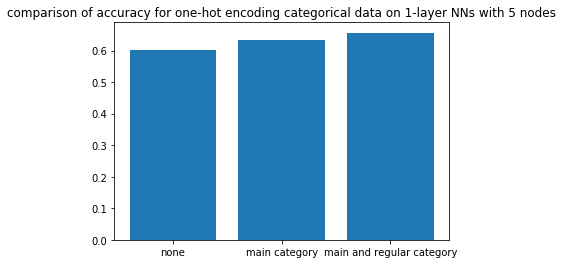

In [26]:
fig, ax = plt.subplots()
ax.set_title("comparison of accuracy for one-hot encoding categorical data on 1-layer NNs with 5 nodes")
ax.bar(["none", "main category", "main and regular category"],
       list(map(lambda x: x[1]["accuracy"], one_hot_demonstration)))

In [14]:
%%time

various_configs = []
# { layer_sizes: , dropout: , one_hot: , dataset: , epochs: }
for node_count in [3, 5, 10]:
    for layer_count in [1, 2, 3]:
        layer_config = tuple([node_count]*layer_count)
        for dropout in [None, 0.3]:
            for epochs in [8]:
                for dataset in ["base", "doc2vec", "basicname"]:
                    for one_hot in ["both"]:
                        various_configs.append(build_config(
                            layer_sizes=layer_config,
                            dropout=dropout,
                            one_hot=one_hot,
                            dataset=dataset,
                            epochs=epochs))
#                         various_configs.append({
#                             "layer_sizes": layer_config,
#                             "dropout": dropout,
#                             "one_hot": one_hot,
#                             "dataset": dataset,
#                             "epochs": epochs
#                         })

print("CONFIGURATIONS:")
pprint(various_configs)
print()
print()
config_results = get_results_for_configs(various_configs)

CONFIGURATIONS:
[{'dataset': 'base',
  'dropout': None,
  'epochs': 8,
  'layer_sizes': (3,),
  'lr': 0.01,
  'one_hot': 'both'},
 {'dataset': 'doc2vec',
  'dropout': None,
  'epochs': 8,
  'layer_sizes': (3,),
  'lr': 0.01,
  'one_hot': 'both'},
 {'dataset': 'basicname',
  'dropout': None,
  'epochs': 8,
  'layer_sizes': (3,),
  'lr': 0.01,
  'one_hot': 'both'},
 {'dataset': 'base',
  'dropout': 0.3,
  'epochs': 8,
  'layer_sizes': (3,),
  'lr': 0.01,
  'one_hot': 'both'},
 {'dataset': 'doc2vec',
  'dropout': 0.3,
  'epochs': 8,
  'layer_sizes': (3,),
  'lr': 0.01,
  'one_hot': 'both'},
 {'dataset': 'basicname',
  'dropout': 0.3,
  'epochs': 8,
  'layer_sizes': (3,),
  'lr': 0.01,
  'one_hot': 'both'},
 {'dataset': 'base',
  'dropout': None,
  'epochs': 8,
  'layer_sizes': (3, 3),
  'lr': 0.01,
  'one_hot': 'both'},
 {'dataset': 'doc2vec',
  'dropout': None,
  'epochs': 8,
  'layer_sizes': (3, 3),
  'lr': 0.01,
  'one_hot': 'both'},
 {'dataset': 'basicname',
  'dropout': None,
  'epoc

249956/249956 [==============================] - 4s 17us/sample - loss: 0.6068 - accuracy: 0.6660
Epoch 6/8
249956/249956 [==============================] - 4s 16us/sample - loss: 0.6060 - accuracy: 0.6662
Epoch 7/8
249956/249956 [==============================] - 4s 17us/sample - loss: 0.6054 - accuracy: 0.6673
Epoch 8/8
249956/249956 [==============================] - 4s 17us/sample - loss: 0.6050 - accuracy: 0.6671
results: {'loss': 0.6087037285358989, 'accuracy': 0.66014016}
using config: {'one_hot': 'both', 'dataset': 'basicname', 'epochs': 8, 'layer_sizes': (3,), 'dropout': None, 'lr': 0.01}
epochs: 8 layer_sizes: (3,) dropout: None
Train on 249956 samples
Epoch 1/8
249956/249956 [==============================] - 4s 18us/sample - loss: 0.6742 - accuracy: 0.5975
Epoch 2/8
249956/249956 [==============================] - 4s 16us/sample - loss: 0.6740 - accuracy: 0.5976
Epoch 3/8
249956/249956 [==============================] - 4s 16us/sample - loss: 0.6740 - accuracy: 0.5976
Epoch

249956/249956 [==============================] - 4s 17us/sample - loss: 0.6740 - accuracy: 0.5976
results: {'loss': 0.672703298750761, 'accuracy': 0.60080004}
using config: {'one_hot': 'both', 'dataset': 'base', 'epochs': 8, 'layer_sizes': (3, 3), 'dropout': 0.3, 'lr': 0.01}
epochs: 8 layer_sizes: (3, 3) dropout: 0.3
Train on 249956 samples
Epoch 1/8
249956/249956 [==============================] - 5s 18us/sample - loss: 0.6627 - accuracy: 0.6112
Epoch 2/8
249956/249956 [==============================] - 4s 17us/sample - loss: 0.6434 - accuracy: 0.6254
Epoch 3/8
249956/249956 [==============================] - 4s 17us/sample - loss: 0.6382 - accuracy: 0.6279
Epoch 4/8
249956/249956 [==============================] - 4s 17us/sample - loss: 0.6371 - accuracy: 0.6277
Epoch 5/8
249956/249956 [==============================] - 4s 17us/sample - loss: 0.6357 - accuracy: 0.6271
Epoch 6/8
249956/249956 [==============================] - 4s 17us/sample - loss: 0.6342 - accuracy: 0.6279
Epoch 7/8

249956/249956 [==============================] - 6s 23us/sample - loss: 0.6684 - accuracy: 0.5975
Epoch 2/8
249956/249956 [==============================] - 4s 17us/sample - loss: 0.6630 - accuracy: 0.5975
Epoch 3/8
249956/249956 [==============================] - 4s 18us/sample - loss: 0.6593 - accuracy: 0.5975
Epoch 4/8
249956/249956 [==============================] - 4s 18us/sample - loss: 0.6568 - accuracy: 0.5975
Epoch 5/8
249956/249956 [==============================] - 5s 18us/sample - loss: 0.6556 - accuracy: 0.5976
Epoch 6/8
249956/249956 [==============================] - 4s 17us/sample - loss: 0.6527 - accuracy: 0.5976
Epoch 7/8
249956/249956 [==============================] - 4s 18us/sample - loss: 0.6523 - accuracy: 0.5976
Epoch 8/8
249956/249956 [==============================] - 5s 18us/sample - loss: 0.6508 - accuracy: 0.5976
results: {'loss': 0.6372480996874293, 'accuracy': 0.60080004}
using config: {'one_hot': 'both', 'dataset': 'basicname', 'epochs': 8, 'layer_sizes'

Epoch 5/8
249956/249956 [==============================] - 4s 17us/sample - loss: 0.6626 - accuracy: 0.5976
Epoch 6/8
249956/249956 [==============================] - 4s 16us/sample - loss: 0.6594 - accuracy: 0.5976
Epoch 7/8
249956/249956 [==============================] - 4s 15us/sample - loss: 0.6575 - accuracy: 0.5976
Epoch 8/8
249956/249956 [==============================] - 4s 16us/sample - loss: 0.6557 - accuracy: 0.5976
results: {'loss': 0.6545988162329919, 'accuracy': 0.60080004}
using config: {'one_hot': 'both', 'dataset': 'base', 'epochs': 8, 'layer_sizes': (5, 5), 'dropout': None, 'lr': 0.01}
epochs: 8 layer_sizes: (5, 5) dropout: None
Train on 249956 samples
Epoch 1/8
249956/249956 [==============================] - 4s 17us/sample - loss: 0.6402 - accuracy: 0.6332
Epoch 2/8
249956/249956 [==============================] - 4s 14us/sample - loss: 0.6133 - accuracy: 0.6608
Epoch 3/8
249956/249956 [==============================] - 4s 15us/sample - loss: 0.6094 - accuracy: 0.6

249956/249956 [==============================] - 4s 16us/sample - loss: 0.6052 - accuracy: 0.6661
results: {'loss': 0.6089835089810282, 'accuracy': 0.65812504}
using config: {'one_hot': 'both', 'dataset': 'doc2vec', 'epochs': 8, 'layer_sizes': (5, 5, 5), 'dropout': None, 'lr': 0.01}
epochs: 8 layer_sizes: (5, 5, 5) dropout: None
Train on 249956 samples
Epoch 1/8
249956/249956 [==============================] - 5s 19us/sample - loss: 0.6421 - accuracy: 0.6321
Epoch 2/8
249956/249956 [==============================] - 4s 16us/sample - loss: 0.6134 - accuracy: 0.6610
Epoch 3/8
249956/249956 [==============================] - 4s 16us/sample - loss: 0.6090 - accuracy: 0.6634
Epoch 4/8
249956/249956 [==============================] - 4s 15us/sample - loss: 0.6071 - accuracy: 0.6651
Epoch 5/8
249956/249956 [==============================] - 5s 19us/sample - loss: 0.6055 - accuracy: 0.6661
Epoch 6/8
249956/249956 [==============================] - 5s 22us/sample - loss: 0.6044 - accuracy: 0.66

249956/249956 [==============================] - 5s 20us/sample - loss: 0.6576 - accuracy: 0.6076
Epoch 2/8
249956/249956 [==============================] - 4s 17us/sample - loss: 0.6416 - accuracy: 0.6270
Epoch 3/8
249956/249956 [==============================] - 4s 17us/sample - loss: 0.6356 - accuracy: 0.6362
Epoch 4/8
249956/249956 [==============================] - 4s 16us/sample - loss: 0.6315 - accuracy: 0.6419
Epoch 5/8
249956/249956 [==============================] - 4s 16us/sample - loss: 0.6286 - accuracy: 0.6462
Epoch 6/8
249956/249956 [==============================] - 4s 15us/sample - loss: 0.6266 - accuracy: 0.6484
Epoch 7/8
249956/249956 [==============================] - 4s 16us/sample - loss: 0.6244 - accuracy: 0.6508
Epoch 8/8
249956/249956 [==============================] - 4s 16us/sample - loss: 0.6233 - accuracy: 0.6527
results: {'loss': 0.6229989278093847, 'accuracy': 0.6530121}
using config: {'one_hot': 'both', 'dataset': 'base', 'epochs': 8, 'layer_sizes': (10,

249956/249956 [==============================] - 5s 18us/sample - loss: 0.6245 - accuracy: 0.6513
Epoch 5/8
249956/249956 [==============================] - 4s 17us/sample - loss: 0.6232 - accuracy: 0.6515
Epoch 6/8
249956/249956 [==============================] - 4s 17us/sample - loss: 0.6218 - accuracy: 0.6539
Epoch 7/8
249956/249956 [==============================] - 4s 17us/sample - loss: 0.6209 - accuracy: 0.6544
Epoch 8/8
249956/249956 [==============================] - 4s 17us/sample - loss: 0.6203 - accuracy: 0.6544
results: {'loss': 0.6152857323170297, 'accuracy': 0.65523773}
using config: {'one_hot': 'both', 'dataset': 'doc2vec', 'epochs': 8, 'layer_sizes': (10, 10), 'dropout': 0.3, 'lr': 0.01}
epochs: 8 layer_sizes: (10, 10) dropout: 0.3
Train on 249956 samples
Epoch 1/8
249956/249956 [==============================] - 5s 18us/sample - loss: 0.6529 - accuracy: 0.6166
Epoch 2/8
249956/249956 [==============================] - 4s 17us/sample - loss: 0.6357 - accuracy: 0.6373
E

249956/249956 [==============================] - 5s 21us/sample - loss: 0.6297 - accuracy: 0.6524
Epoch 8/8
249956/249956 [==============================] - 5s 19us/sample - loss: 0.6288 - accuracy: 0.6537
results: {'loss': 0.6229894027544605, 'accuracy': 0.6570423}
using config: {'one_hot': 'both', 'dataset': 'basicname', 'epochs': 8, 'layer_sizes': (10, 10, 10), 'dropout': 0.3, 'lr': 0.01}
epochs: 8 layer_sizes: (10, 10, 10) dropout: 0.3
Train on 249956 samples
Epoch 1/8
249956/249956 [==============================] - 5s 21us/sample - loss: 0.6748 - accuracy: 0.5972
Epoch 2/8
249956/249956 [==============================] - 5s 19us/sample - loss: 0.6740 - accuracy: 0.5975
Epoch 3/8
249956/249956 [==============================] - 5s 18us/sample - loss: 0.6740 - accuracy: 0.5975
Epoch 4/8
249956/249956 [==============================] - 5s 19us/sample - loss: 0.6740 - accuracy: 0.5975
Epoch 5/8
249956/249956 [==============================] - 5s 18us/sample - loss: 0.6740 - accuracy:

In [15]:
pprint(config_results)

[({'dataset': 'base',
   'dropout': None,
   'epochs': 8,
   'layer_sizes': (3,),
   'lr': 0.01,
   'one_hot': 'both'},
  {'accuracy': 0.6595086, 'loss': 0.6093835780672849}),
 ({'dataset': 'doc2vec',
   'dropout': None,
   'epochs': 8,
   'layer_sizes': (3,),
   'lr': 0.01,
   'one_hot': 'both'},
  {'accuracy': 0.66014016, 'loss': 0.6087037285358989}),
 ({'dataset': 'basicname',
   'dropout': None,
   'epochs': 8,
   'layer_sizes': (3,),
   'lr': 0.01,
   'one_hot': 'both'},
  {'accuracy': 0.60080004, 'loss': 0.6727039736928271}),
 ({'dataset': 'base',
   'dropout': 0.3,
   'epochs': 8,
   'layer_sizes': (3,),
   'lr': 0.01,
   'one_hot': 'both'},
  {'accuracy': 0.65601975, 'loss': 0.6125148394300782}),
 ({'dataset': 'doc2vec',
   'dropout': 0.3,
   'epochs': 8,
   'layer_sizes': (3,),
   'lr': 0.01,
   'one_hot': 'both'},
  {'accuracy': 0.65710247, 'loss': 0.6119894910304721}),
 ({'dataset': 'basicname',
   'dropout': 0.3,
   'epochs': 8,
   'layer_sizes': (3,),
   'lr': 0.01,
   'on

In [54]:
file = open("config_results-%s.pickle" % (datetime.datetime.now().timestamp()), "wb")
pickle.dump(config_results, file)
file.close()